# Notebook_3 - Lotka-Volterra Competition

### Import needed packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# let's set things up so we have nice font sizes
plt.rcParams.update({'font.size': 12})

### Goals

We want to explore numerical solutions to the Lotka Volterra Model
$$\frac{dn_1}{dt} = r_1 n_1(t) \left(1-\frac{n_1(t) + {\color{red}\alpha_{12}}\ n_2(t)}{K_1}\right)$$
$$\frac{dn_2}{dt} = r_2 n_2(t) \left(1-\frac{n_2(t) + {\color{blue}\alpha_{21}}\ n_1(t)}{K_2}\right)$$
with the initial conditions
$$n_1(0)=a, \quad n_2(0)=b $$

# Euler's Method for two variables

In [2]:
def f(n,parameters):
    '''
    n - vector of variables
    parameters - tuple of parameters
    
    This function returns the values of dn1/dt and dn2/dt
    evaluated using the Lotka-Volterra Equations. 
    '''
    r1,r2,K1,K2,alpha12,alpha21 = parameters
    n1,n2 = n
    dn1 = r1*n1*(1-(n1+alpha12*n2)/K1)
    dn2 = r2*n2*(1-(n2+alpha21*n1)/K2)
    return np.array([dn1,dn2])

In [3]:
def forward_euler_step(t,n,f,h,parameters):
    '''
    t - current time 
    n - current vector of variables
    f - function to compute derivatives
    h - step size (should be small)
    parameters - parameters passed into the ODEs in function f
    
    This function takes a single Forward Euler Method step
    '''
    n_next = n + h * f(n,parameters)
    t_next = t + h
    return t_next,n_next

In [4]:
def ode_solve(f,t0,n0,tf,parameters):
    '''
    f - the ODE to solve (function)
    t0 - initial time
    n0 - vector of initial values of variables
    tf - final time to integrate to
    parameters - parameters passed into the ODEs
    
    This function numerically solves the ODE f, subject to initial conditions (t0,n0)
    and integrates until tf is reached. 
    '''
    # Pick a step size (leave this small)
    h=0.01
    # Initialize some empty Python lists to store the solution
    t_solution = []
    n_solution = []
    t_solution.append(t0)
    n_solution.append(n0)
    # We'll keep stepping forward until we've reached x_final
    while ( t_solution[-1]<tf ):
        # take a step
        t_next,n_next=forward_euler_step(t_solution[-1],n_solution[-1],f,h,parameters)
        t_solution.append(t_next)
        n_solution.append(n_next)
    return np.array(t_solution), np.array(n_solution)

In [6]:
### PARAMETER CHOICES
r1,r2 = 1, 1
K1,K2 = 10, 10
alpha12, alpha21 = -1, -1 
parameters = (r1,r2,K1,K2,alpha12,alpha21)

### INITIAL CONDITIONS
n1_initial = 1
n2_initial = 1
t0=0
n0=np.array([n1_initial,n2_initial])

### INTEGRATE
tf=20
t,n = ode_solve(f,t0,n0,tf,parameters)

(0.0, 461250515.2526002)

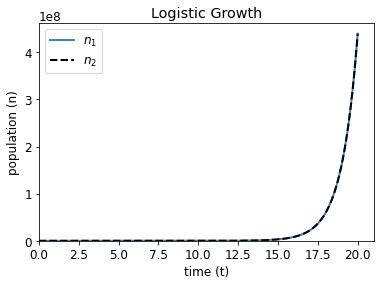

In [7]:
# Set up the axes
fig, ax = plt.subplots(nrows=1,ncols=1)
# Plot the numerical solution
ax.plot(t,n[:,0],
        color='steelblue',label='$n_1$',lw=2)
ax.plot(t,n[:,1],
        color='k',ls='--',label='$n_2$',lw=2)

# Make the plot attractive
ax.set_xlabel('time (t)')
ax.set_ylabel('population (n)')
ax.legend(loc='best')
ax.set_title('Logistic Growth')
ax.set_xlim(left=0)
ax.set_ylim(bottom=0)